Part 1:  What is overfitting? Why is it a special problem when working with machine learning (data-adaptive) models? How can we protect against overfitting?

I have always thought of overfitting as training your model 'too well.'  By that I mean that you train your model so well for getting the exact expected results with the training data, that the model is no longer accurate for any data that is different or unknown.  For machine learning models, you want to be able to recognize the general pattern of the data and not become overly rigid to the point that the model loses fluidity.  If the model is only accurate with a single data input then it will not be a very good model.

One way that I know Data Scientists help to protect against overfitting is done at the very start of the analysis; they split the relevant data into a training set and testing set.  By splitting the data into two, it allows you to compare how the model performs based on a set of data that it has seen (training set), as well as the unseen set of data (test set).  A good model should not have a drastic difference in performance between the two sets.  If there is a reduction in quality, it might be a sign that the model is overfit to the training data.|

Part 2:  Every week, I want you to share Python coding as a Team.  To start, go to Kaggle.com and sign up for the Titanic: Machine Learning Through Disaster competition. https://www.kaggle.com/c/titanic

Download the train.csv dataset and run some basic descriptive statistics and graphs for two or more variables of your choosing using Python.  Provide your Python code here, perhaps as a Jupyter notebook .html file on GitHub.  Embed at least one graph in your discussion by using the "Files" link in the upper right portion of Canvas.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


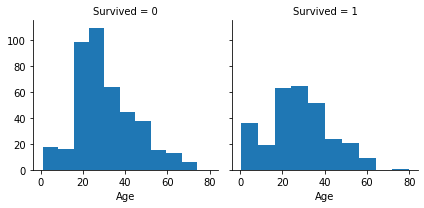

In [17]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=10)

In [31]:
def bar_chart(feature):
    First = df[df['Pclass']==1][feature].value_counts()
    Second = df[df['Pclass']==2][feature].value_counts()
    Third = df[df['Pclass']==3][feature].value_counts()
    df1 = pd.DataFrame([First,Second,Third])
    df1.index=['First','Second','Third']
    df1.plot(kind='bar',stacked=True,fig=(18,6),title=feature)

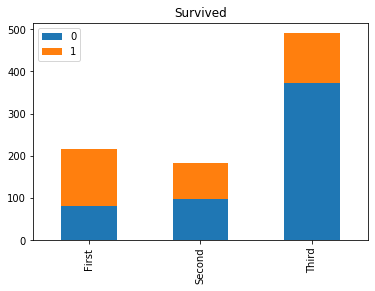

In [32]:
bar_chart('Survived')

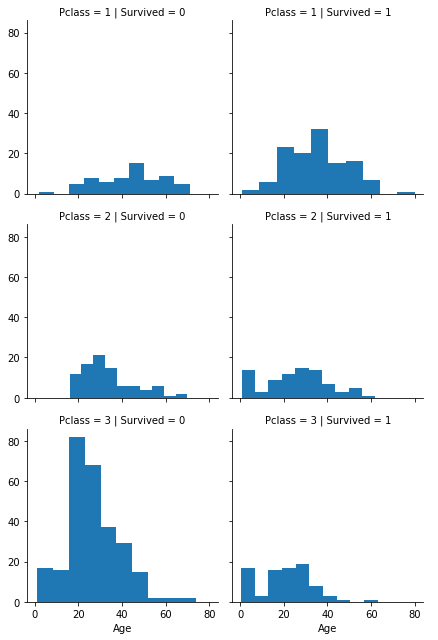

In [18]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass')
grid.map(plt.hist,'Age',bins=10)
grid.add_legend()